In [79]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [81]:
df=pd.read_csv(r"C:\Users\ASUS\Documents\pythonStack\DS_PR\AcademicPerformance_New.csv")

In [85]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [91]:
df.describe(include='all')

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
count,98.000000,98,91.000000,95.000000,89.000000,98.000000,98,98
unique,NaN,5,NaN,NaN,NaN,NaN,4,2
top,NaN,USA,NaN,NaN,NaN,NaN,D,Yes
freq,NaN,30,NaN,NaN,NaN,NaN,52,49
mean,50.479592,NaN,61.164835,64.652632,62.235955,58.663265,NaN,NaN
std,28.469274,NaN,14.995009,14.893072,16.216590,16.518482,NaN,NaN
min,1.000000,NaN,18.000000,26.000000,20.000000,26.000000,NaN,NaN
25%,26.250000,NaN,51.000000,54.500000,52.000000,45.250000,NaN,NaN
50%,50.500000,NaN,63.000000,66.000000,63.000000,59.333333,NaN,NaN
75%,74.750000,NaN,71.000000,74.000000,74.000000,71.916667,NaN,NaN


In [107]:
df['WT'].isnull().sum()


10

In [103]:
df['WT']=df['WT'].fillna(df['WT'].mean())

In [109]:
df['AI'].isnull().sum()

10

In [111]:
df['DSBDA'].isnull().sum()

4

In [117]:
for i in ['DSBDA','AI']:
    df[i]=df[i].fillna(df[i].mean())

In [123]:
df['DSBDA'].isnull().sum() ,df['AI'].isnull().sum() 

(0, 0)

In [145]:
for i in ['NationalITy','Grade']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [147]:
df['NationalITy'].isnull().sum(),df['Grade'].isnull().sum()

(0, 0)

In [149]:
from scipy.stats import zscore

In [151]:
num_cols=['WT','AI','DSBDA','Average']

In [153]:
z_score=df[num_cols].apply(zscore)

In [155]:
z_score

,WT,AI,DSBDA,Average
0,7.578533e-01,0.769438,0.506292,NaN
1,5.480217e-01,0.000000,1.746635,NaN
2,4.969810e-16,0.000000,0.000000,NaN
3,-9.907433e-01,-1.192739,0.000000,NaN
4,1.037629e+00,0.000000,0.919740,NaN
...,...,...,...,...
94,1.247460e+00,0.000000,0.000000,NaN
95,1.177516e+00,1.292685,1.126464,NaN
96,2.682462e-01,-0.015433,0.092844,NaN
97,1.283585e-01,0.507814,0.506292,NaN


In [169]:
((z_score)<3).sum()

WT         99
AI         99
DSBDA      99
Average     0
dtype: int64

In [171]:
df['Performance'] = pd.cut(df['Average']
bins=[0, 50, 70, 100], labels=['Low', 'Medium', 'High'])

In [189]:
Performance=df['Performance'].value_counts()

<Axes: xlabel='Performance'>

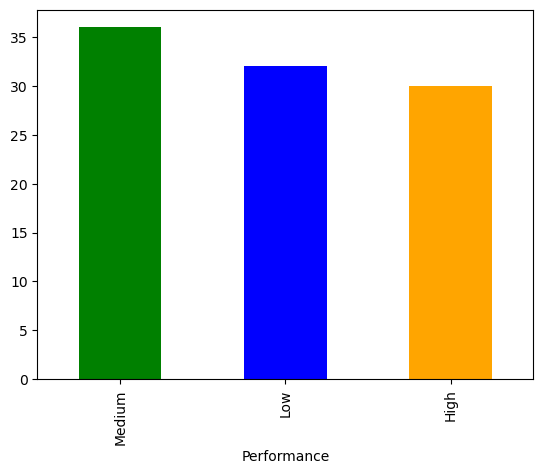

In [193]:
Performance.plot(kind='bar',color=['green','blue','orange'])